In [1]:
# Necessary imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

In [2]:
# Read the CSV file
fuel_econ = pd.read_csv('fuel_econ.csv')
fuel_econ.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,pv2,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,79,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,94,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,94,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,0,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8


In [16]:
# Convert the "VClass" column from a plain object type into an ordered categorical type
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']
vclasses = pd.api.types.CategoricalDtype(ordered=True, categories=sedan_classes)
fuel_econ['VClass'] = fuel_econ['VClass'].astype(vclasses);
fuel_econ['trans_type'] = fuel_econ['trans'].apply(lambda x:x.split()[0])

In [17]:
print(fuel_econ.shape)

(3929, 21)


In [29]:
#randomly choose subset of the data
#NOT true random
np.random.seed(2018)
sample = np.random.choice(fuel_econ.shape[0], 200, replace=True)
fuel_econ_subset = fuel_econ.loc[sample]

In [19]:
fuel_econ_subset.head(2)

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
1274,34649,Kia,K900,2015,Large Cars,Rear-Wheel Drive,Automatic 8-spd,Regular Gasoline,6,3.8,...,110,17.7469,22.2,26.2583,37.1,20.7776,428,5,5,Automatic
2662,37387,Lincoln,MKZ FWD,2017,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.0,...,99,20.9627,26.6,31.1035,44.7,24.0000,370,5,5,Automatic


Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

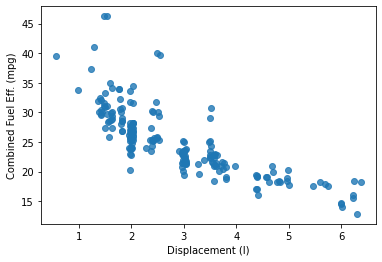

In [20]:
sb.regplot(data=fuel_econ_subset, x='displ', y='comb',
           x_jitter=0.04, fit_reg=False);
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

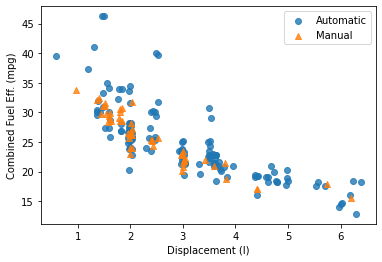

In [28]:
# diff using transmission type for the displ vs comb 
ttpye_markers = [['Automatic', 'o'],
                ['Manual', '^']]
for ttype, marker in ttpye_markers:
    plot_data = fuel_econ_subset.loc[fuel_econ_subset['trans_type'] == ttype]
    # seperate difference transmission
    #print(plot_data.head()) 
    sb.regplot(data=plot_data, x='displ', y='comb',
              x_jitter=0.04, fit_reg=False, marker=marker);

plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')
plt.legend(['Automatic', 'Manual'])

Text(0, 0.5, 'Combined Fuel Eff. (mpg)')

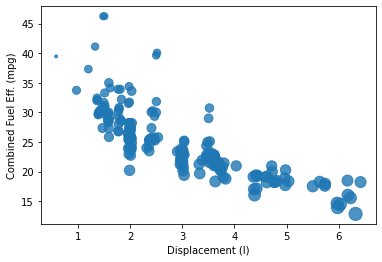

In [33]:
# add a 3rd variable CO2
sb.regplot(data=fuel_econ_subset, x='displ', y='comb',
           x_jitter=0.04, fit_reg=False, 
           scatter_kws = {'s' : fuel_econ_subset['co2']/4});
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

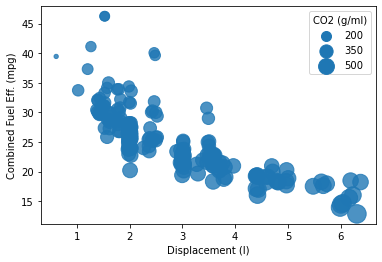

In [35]:
# add a 3rd variable CO2
sb.regplot(data=fuel_econ_subset, x='displ', y='comb',
           x_jitter=0.04, fit_reg=False, 
           scatter_kws = {'s' : fuel_econ_subset['co2']/2});
plt.xlabel('Displacement (l)')
plt.ylabel('Combined Fuel Eff. (mpg)')

sizes = [200, 350, 500]
base_color = sb.color_palette()[0]
legend_obj = []
for s in sizes:
    legend_obj.append(plt.scatter([],[], s=s/2, color=base_color))
    
plt.legend(legend_obj, sizes, title='CO2 (g/ml)');